In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [2]:
file_path ="C:\\Users\\sudhi\\OneDrive\\Desktop\\Credit Card \\"
cust_name = "Customer Acqusition.csv"
spends_name = "spend.csv"
repayment_name = "Repayment.csv"
cc_data_name ="Credit Card Data.xlsx"

In [3]:
cust = pd.read_csv(file_path + cust_name)
spends = pd.read_csv(file_path + spends_name)
repay = pd.read_csv(file_path + repayment_name)
cc_data = pd.read_excel(file_path + cc_data_name)
repay =repay[['SL No:','Customer','Month','Amount']]

# 
In the above dataset,

In case age is less than 18, replacing it with mean of age values.

In [4]:
for i in range(len(cust['Age'])):
    if(cust['Age'][i] < 18):
        cust['Age'][i]=int(cust['Age'].mean())

# 
 spend amount is more than the limit, replacing it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [5]:
new_spends=pd.merge(left = spends,right =cust[['Customer','Limit']],left_on ='Customer',right_on ='Customer',how ='left')

In [6]:
for i in range(len(new_spends['Amount'])):
    if(new_spends['Amount'][i]>new_spends['Limit'][i]):
        new_spends['Amount'][i]=new_spends['Limit'][i]*0.5

# 
the repayment amount is more than the limit, replace the repayment with the
limit.

In [7]:
new_repay =pd.merge(left = repay[['Customer','Month','Amount']],right=cust[['Customer','Limit']],left_on ='Customer',right_on='Customer',how ='inner')

In [8]:
for i in range(len(new_repay['Amount'])):
    if (new_repay['Amount'][i] > new_repay['Limit'][i]):
        new_repay['Amount'][i] = new_repay['Limit'][i]

# 
From the above dataset created the following summaries:
a. How many distinct customers exist

In [9]:
print(cust['Customer'].nunique(),'distinct customers exist')

100 distinct customers exist


# 
b.  distinct categories

In [10]:
print('There are ',spends['Type'].nunique(),'distinct categories')

There are  15 distinct categories


#
c.  average monthly spend by customers

In [11]:
new_spends['Month']= pd.to_datetime(new_spends['Month'])

In [12]:
new_spends['Year'] = new_spends.Month.dt.year

In [13]:
new_spends['Month_name'] = new_spends.Month.dt.month_name()

In [14]:
monthly_spends=new_spends.groupby(by =['Month_name']).agg(Avg_Spend =('Amount',np.mean))

In [15]:
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_spends=monthly_spends.loc[month_order]


In [16]:
monthly_spends

,Avg_Spend
Month_name,
January,147770.183266
February,151261.565126
March,131840.761861
April,135035.927333
May,151623.982190
June,182037.731429
July,166326.817857
August,165759.596190
September,141131.704524


# 
d. average monthly repayment by customers

In [17]:
new_repay['Month'] = pd.to_datetime(new_repay['Month'])

In [18]:
new_repay['Month_name'] = new_repay.Month.dt.month_name()

In [19]:
monthly_repay=new_repay.groupby(by=['Month_name']).agg(Avg_Repay =('Amount',np.mean))

In [20]:
monthly_repay=monthly_repay.loc[month_order]

In [21]:
monthly_repay.head(10)

,Avg_Repay
Month_name,
January,163445.534263
February,158873.098158
March,156430.854155
April,167676.814933
May,186097.903985
June,114146.549375
July,165203.918980
August,152817.425510
September,129345.768500


# 
e. the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [22]:
Q2=pd.merge(left = monthly_spends,right = monthly_repay,left_on = ['Month_name'],right_on =['Month_name'],how ='inner')

In [23]:
Q2['Monthly_Profit'] = Q2['Avg_Repay'] - Q2['Avg_Spend']

In [24]:
Q2['Bank_profit']=0

In [81]:
for i in range(len(Q2['Monthly_Profit'])):
    if(Q2['Monthly_Profit'][i]>0):
        Q2['Bank_profit'][i] = Q2['Monthly_Profit'][i]*0.29
    else:
        Q2['Bank_profit'][i]=0

In [82]:
bank_monthly_profit=Q2.groupby(by=['Month_name']).agg(Bank_profit=('Bank_profit',sum))

In [83]:
bank_monthly_profit.loc[month_order]

,Bank_profit
Month_name,
January,4545.851789
February,2207.344579
March,7131.126765
April,9465.857404
May,9997.437320
June,0.000000
July,0.000000
August,0.000000
September,0.000000


#
f. the top 5 product types

In [28]:
top=new_spends['Type'].value_counts()

In [29]:
top.head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

#
g.  city  having maximum spend

In [30]:
Cust_Spends=new_spends.groupby(by=['Customer']).agg(Spends = ('Amount',sum))

In [31]:
unique_customers = cust['Customer'].unique()
Cust_uni = pd.DataFrame({'Customer': unique_customers})

In [32]:
Cust_city =pd.merge(left=Cust_uni,right=cust[['Customer','City']],left_on=['Customer'],right_on=['Customer'],how='inner')

In [33]:
Q2_g =pd.merge(left=Cust_city,right=Cust_Spends,left_on=['Customer'],right_on=['Customer'],how='left')

In [34]:
Q2_g1 = Q2_g.groupby(by='City').agg(Max_spend=('Spends',sum))

In [35]:
Q2_g1.head(1)

,Max_spend
City,
BANGALORE,40461647.02


# 
h. age group which is spending more money

In [36]:
Cust_age = pd.merge(left = Cust_Spends,right = cust[['Customer','Age']],left_on='Customer',right_on='Customer',how ='inner')

In [37]:
bin_edges = [18,23,28,33,38,43,48,53,58,63,68,73,78,83 ]
bin_labels = ['18-22', '23-27', '28-32', '33-37','38-42','43-47','48-52','53-57','58-62','63-67','68-72','73-77','77+']


In [38]:
Cust_age['AgeGroup'] = pd.cut(Cust_age['Age'], bins=bin_edges, labels=bin_labels)

In [39]:
Q2_h = Cust_age.groupby(by=['AgeGroup']).agg(Spends =('Spends',sum))

In [40]:
Q2_h.sort_values(by=['Spends'],ascending = False).head(1)

,Spends
AgeGroup,
43-47,38400881.68


# 
i. top 10 customers in terms of repayment

In [41]:
Cust_repay =new_repay.groupby(by=['Customer']).agg(Repay = ('Amount',sum))

In [42]:
Cust_repay.sort_values(by=['Repay'],ascending =False).head(10)

,Repay
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


# 
3. Calculated the city wise spend on each product on yearly basis. Also included a graphical
representation for the same.

In [43]:
Q3_1=pd.merge(left=cust[['Customer','City','Product']],right=new_spends[['Customer','Amount','Year']],left_on=['Customer'],right_on=['Customer'],how='inner')

In [44]:
Q3_1a=Q3_1.groupby(by=['City','Year','Product']).agg(Spends=('Amount',sum))

In [45]:
Q3_1a=Q3_1a.reset_index()

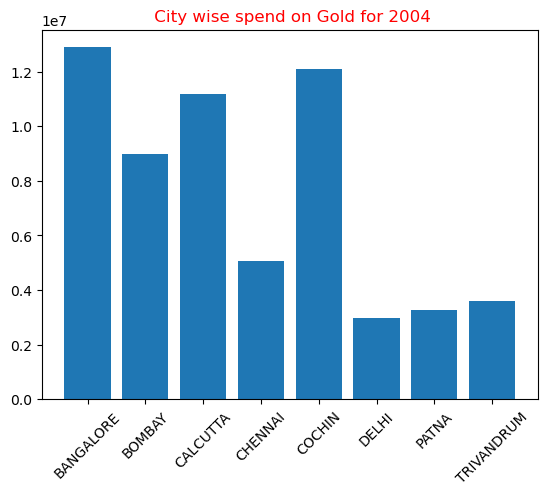

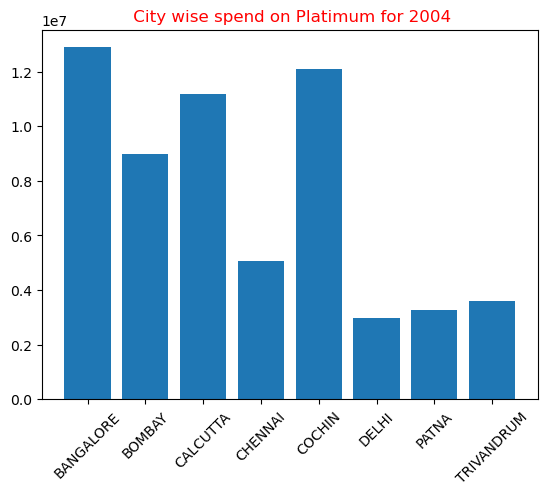

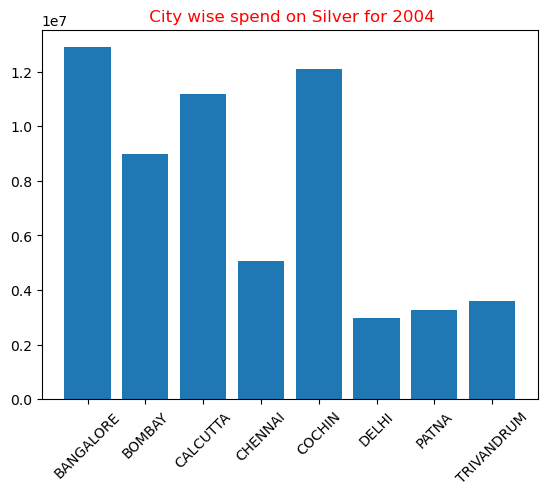

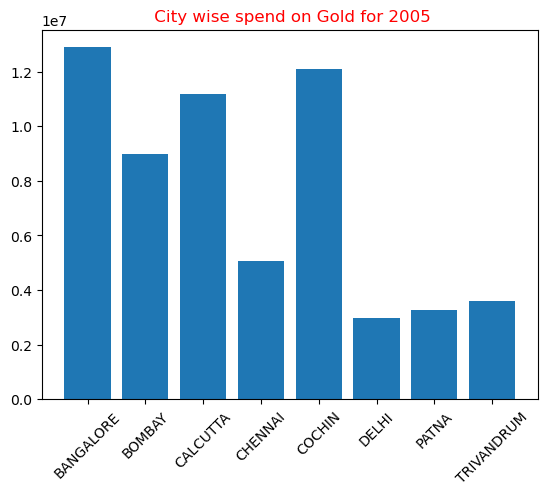

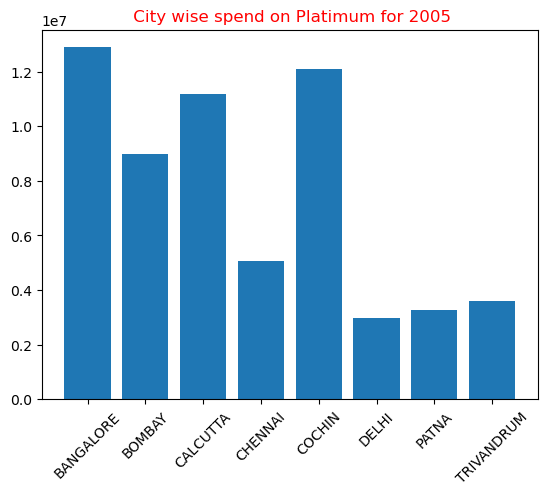

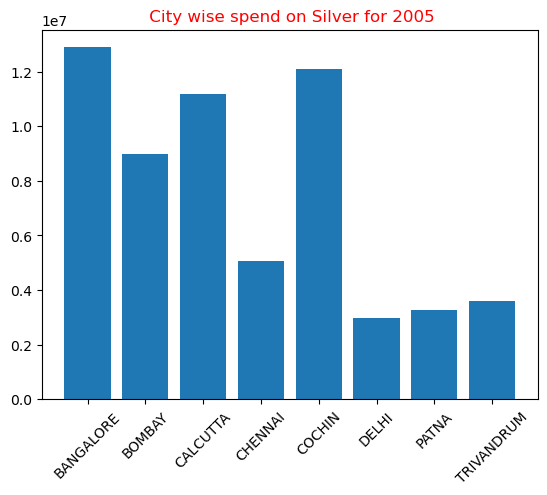

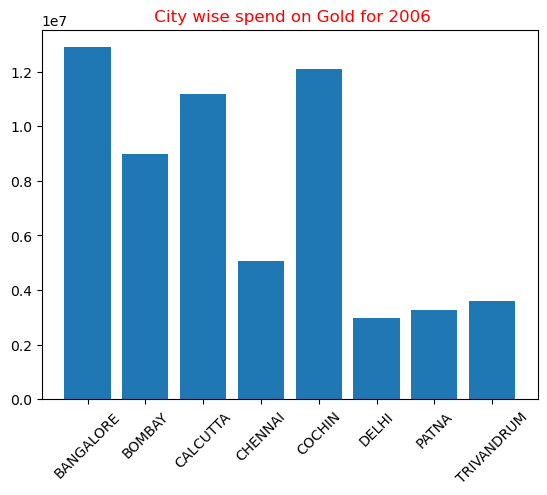

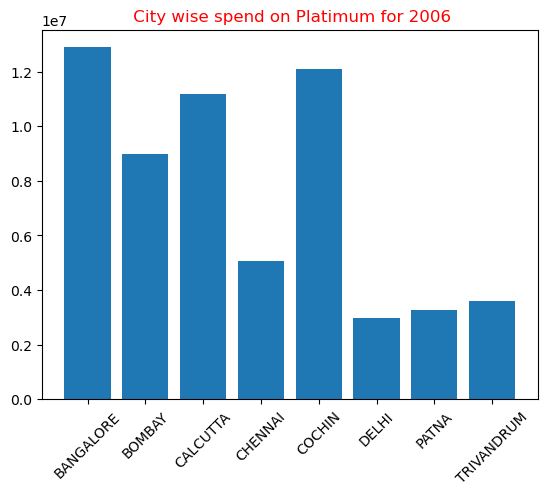

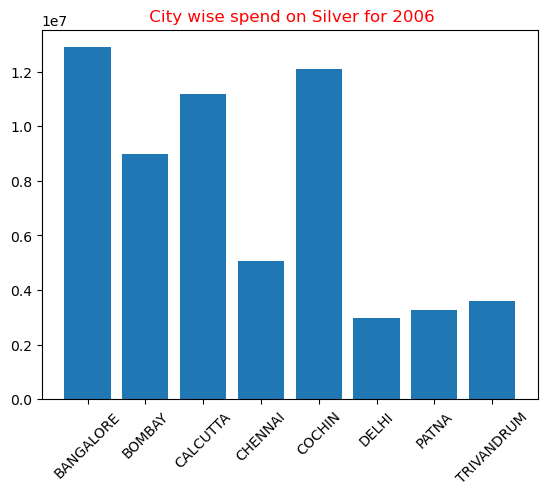

In [46]:
for i in Q3_1a['Year'].unique():
    for a in Q3_1a['Product'].unique():
        plt.figure()
        plt.bar(Q3_1a.City,Q3_1a.Spends)
        plt.xticks(rotation=45)
        plt.title(" City wise spend on %s for %s"%(a,i),c='r')

# 
4. Created graphs for
a. Monthly comparison of total spends, city wise

In [47]:
Q4_1=pd.merge(left=Cust_Spends,right=Cust_city,left_on = ['Customer'],right_on=['Customer'],how='inner')

In [48]:
Q4_2=pd.merge(left=Q4_1,right=new_spends[['Customer','Month_name']],left_on=['Customer'],right_on=['Customer'],how='inner')

In [49]:
Q4_3=Q4_2.groupby(by=['Month_name','City']).agg(Spends=('Spends',sum))

In [50]:
Q4_3=Q4_3.reset_index()

In [51]:
Q4_3=Q4_3.set_index('Month_name')

In [52]:
Q4_3=Q4_3.loc[month_order]

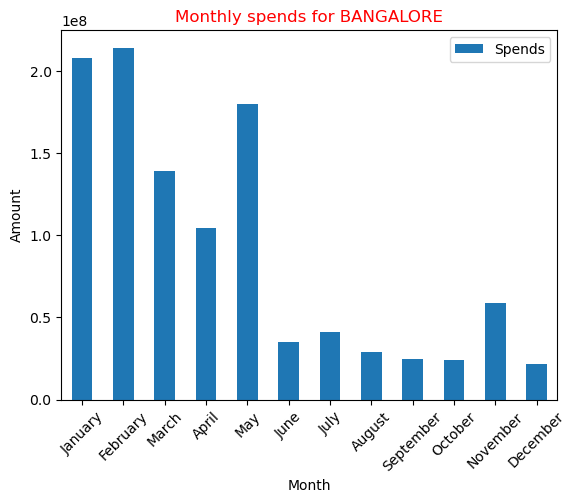

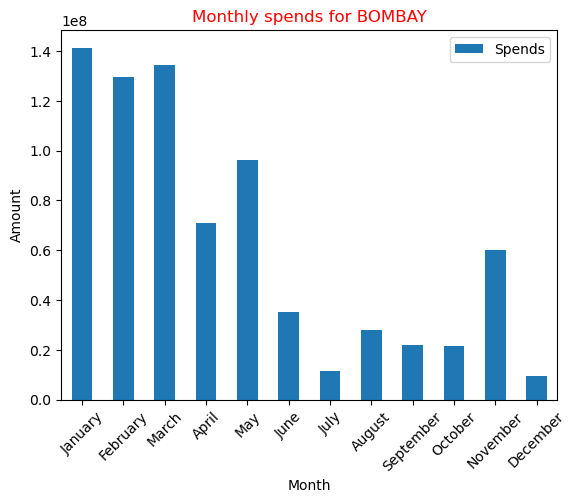

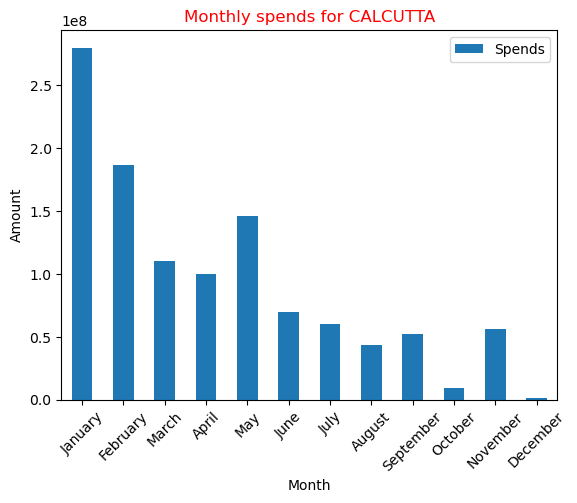

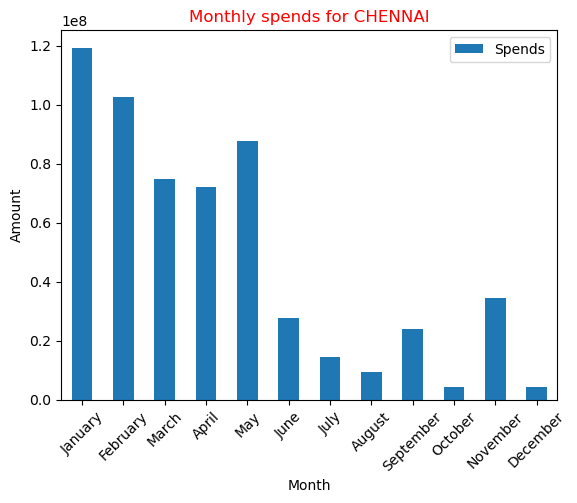

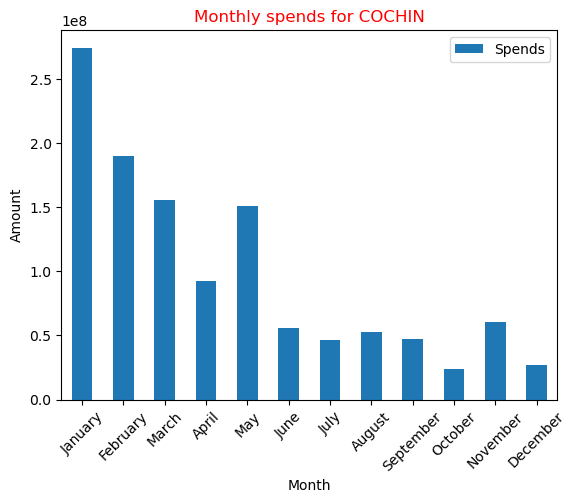

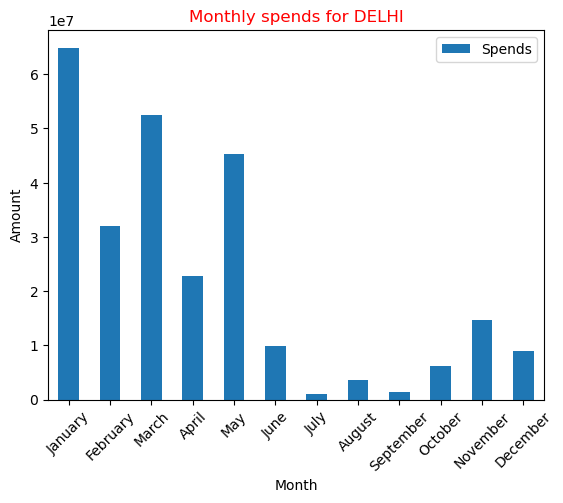

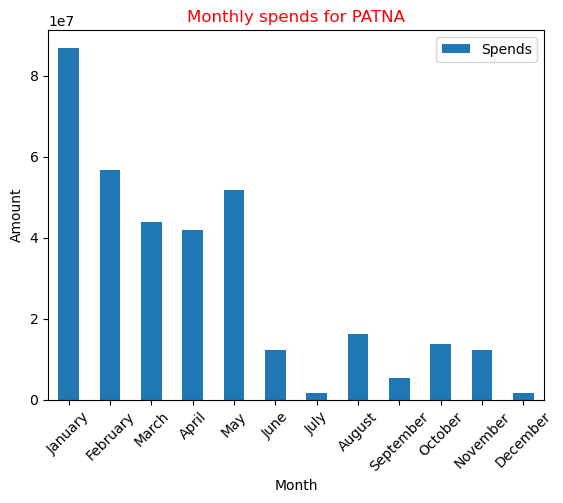

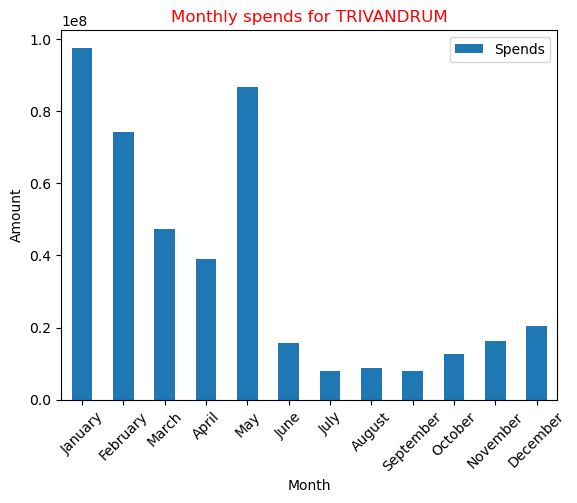

In [53]:
for i in (Q4_3['City'].unique()):
    Q4_3.loc[Q4_3['City']==i].plot(kind='bar')
    plt.title('Monthly spends for %s'%i,c='r')
    plt.ylabel('Amount')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.show()

# 
b. Comparison of yearly spend on air tickets

In [54]:
Q4_b=new_spends.groupby(by=['Year','Type']).agg(Amount=('Amount',sum))

In [55]:
Q4_b=Q4_b.reset_index()

In [56]:
Q4_b1=Q4_b.loc[(Q4_b['Type']=='AIR TICKET')]

In [57]:
Q4_b1=Q4_b1.set_index('Year')

In [58]:
Q4_b1=Q4_b1.drop('Type',axis=1)

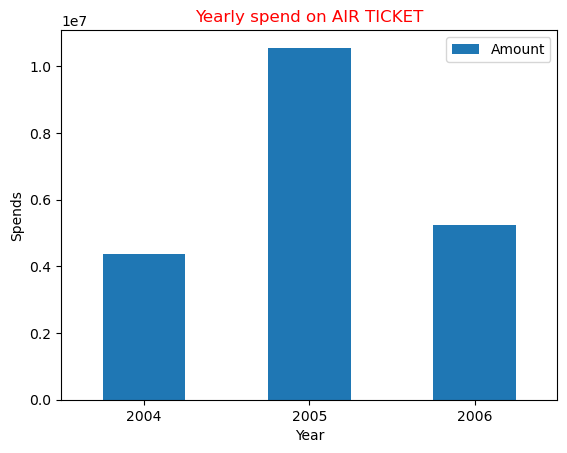

In [59]:
Q4_b1.plot(kind='bar')
plt.ylabel("Spends")
plt.title("Yearly spend on AIR TICKET",c='r')
plt.xticks(rotation=0)
plt.show()

# 
c. Comparison of monthly spend for each product 

In [60]:
Q4_c=pd.merge(left=new_spends[['Customer','Amount','Month_name']],right=cust[['Customer','Product']],left_on=['Customer'],right_on=['Customer'],how='inner')

Q4_c1=Q4_c.groupby(by=['Product','Month_name']).agg(Spends=('Amount',sum))

Q4_c1=Q4_c1.reset_index()

In [61]:
Q4_c1=Q4_c1.set_index('Month_name')

In [62]:
Q4_c1=Q4_c1.loc[month_order]

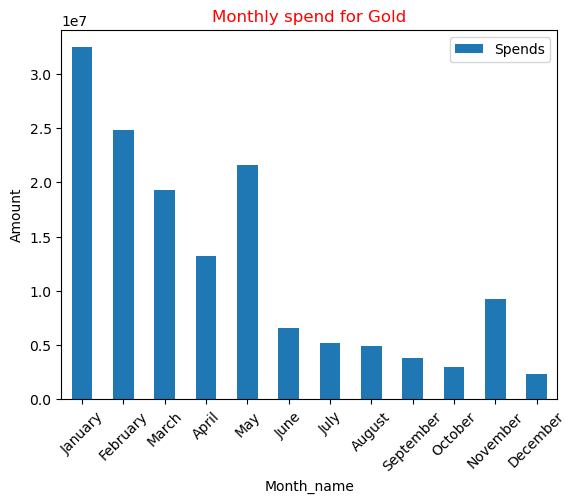

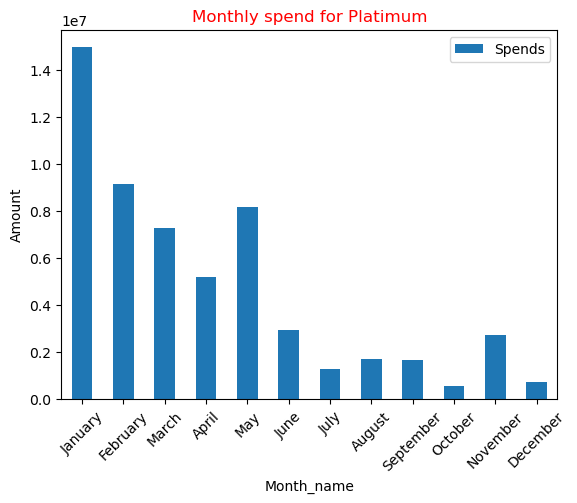

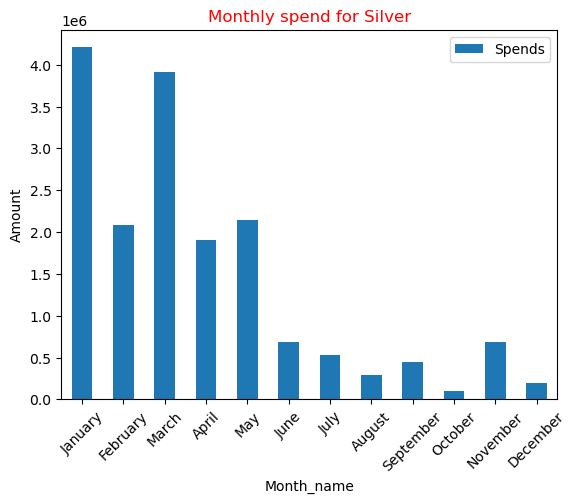

In [63]:
for i in (Q4_c1['Product'].unique()):
    Q4_c1.loc[(Q4_c1['Product']==i)].plot(kind='bar')
    plt.title("Monthly spend for %s"%i,c='r')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)

# 
5. Created a user defined PYTHON function to perform  more analysis:
 found top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [64]:
Q5=pd.merge(left=cust[['Customer','City','Product']],right=new_repay[['Customer','Month','Amount','Month_name']],left_on=['Customer'],right_on=['Customer'],how='inner')

In [65]:
Q5['Year'] =Q5.Month.dt.year

In [66]:
Q5=Q5.groupby(by=['Customer','City','Product','Month_name','Year']).agg(Amount=('Amount',sum)).reset_index()

In [67]:

def top10(df):
    p=input('insert type of product Gold,Silver, Platimum -- ')
    t=input('yearly or monthly -- ')
    if(t=='yearly'):        
        y = pd.DataFrame()
        for i in df['City'].unique():
            x = df.loc[(df['City'] == i) & (df['Product']== p)].sort_values(by='Amount', ascending=False).head(10)
            y = pd.concat([y, x])
            y = y[['Customer','City','Product','Year','Amount']]
    elif(t=='monthly'):
        y = pd.DataFrame() 
        for i in df['City'].unique():
            x = df.loc[(Q5['City'] == i) & (df['Product']== p)].sort_values(by='Amount', ascending=False).head(10)
            y = pd.concat([y, x])
            y = y[['Customer','City','Product','Month_name','Amount']]
    else:
        raise ValueError("Invalid time period. Please choose 'yearly' or 'monthly--'.")
    y=y.sort_values(by=['City','Amount'],ascending = [ True, False])
    return y

In [68]:
top10(Q5)

insert type of product Gold,Silver, Platimum -- Gold
yearly or monthly -- monthly


,Customer,City,Product,Month_name,Amount
3,A1,BANGALORE,Gold,January,2241833.41
464,A43,BANGALORE,Gold,May,1965809.72
459,A43,BANGALORE,Gold,January,1906497.47
49,A13,BANGALORE,Gold,January,1627668.57
295,A30,BANGALORE,Gold,May,1601544.66
...,...,...,...,...,...
263,A28,TRIVANDRUM,Gold,May,466692.43
255,A28,TRIVANDRUM,Gold,December,451630.26
259,A28,TRIVANDRUM,Gold,January,451169.45
254,A28,TRIVANDRUM,Gold,August,437823.07
